In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

    Note: run in megabouts_dlc

In [2]:
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import tables
import flammkuchen as fl

# Computation
from scipy.interpolate import interp1d

#custom functions
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.signal.signaltools import correlate

from tqdm import tqdm

In [ ]:
from segmentation_helper import labels_cat, color
from segmentation_helper import reindex_clusters

In [67]:
from megabouts.utils import (
    bouts_category_name,
    bouts_category_name_short,
    bouts_category_color,
    cmp_bouts,
)


# Set up paths

In [198]:
master_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Raw_Data')

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths, len(fish_paths)


In [200]:
out_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Processed_Data')

In [201]:
fish= 0
fish_path = fish_paths[fish]
fish_id =  fish_paths[fish].name#[:-13]
exp_name = Path(fish_paths[fish]).parts[-2]
exp_name = 'testfish'
exp_name, fish_id

('14052024_visstim_2D_round', '240514_f0')

In [202]:
print ("{} videos found".format(len(fish_paths)))

10 videos found


## Loop

In [203]:

for ind, fish_path in enumerate(tqdm(fish_paths)):
    fish_id =  fish_path.name
    print ('Working on fish {}'.format(fish_id))
    
    data = fl.load(Path(out_path/ '{}_bout_data.h5'.format(fish_id)))
    print('working with {} detected bouts'.format(len(data['cluster'])))
    
    clusters = data['cluster']
    reindexed = reindex_clusters(clusters)
    fl.save(out_path / '{}_reindex_clusters.h5'.format(fish_id), reindexed)



 10%|████████▎                                                                          | 1/10 [00:00<00:00,  9.47it/s]

Working on fish 240514_f0
working with 507 detected bouts
Working on fish 240514_f1
working with 426 detected bouts
Working on fish 240514_f2


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:00, 11.52it/s]

working with 122 detected bouts
Working on fish 240514_f3
working with 595 detected bouts
Working on fish 240514_f4


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:00<00:00, 11.04it/s]

working with 299 detected bouts
Working on fish 240514_f5
working with 323 detected bouts
Working on fish 240514_f6
working with 314 detected bouts


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:00<00:00, 10.62it/s]

Working on fish 240514_f7
working with 330 detected bouts
Working on fish 240514_f8
working with 618 detected bouts


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.57it/s]

Working on fish 240514_f9
working with 632 detected bouts


### check extracted data

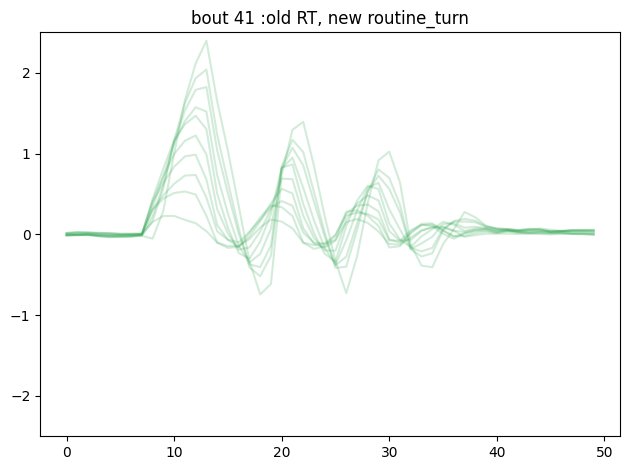

In [191]:
# Generate a random integer from 0 to num_elements - 1
bout = np.random.randint(0, data['tailsums'].shape[0])

plt.figure()
plt.title(f'bout {bout} :old {bouts_category_name_short[clusters[bout][0]]}, new {labels_cat[reindexed[bout][0]]}')
plt.plot(data['tail_vectors'][bout], c=color[reindexed[bout][0]], alpha=0.2)
plt.ylim(-2.5, 2.5)
plt.tight_layout()